In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Class representing a 2D Ising model
class Ising:
    def __init__(self, N, J, H):
        self.lattice = np.random.choice([-1,1], size=(N,N)) # initial state
        self.N = N # dimension
        self.J = np.abs(J) # interaction energy, non-negative by definition
        self.H = H # external field

In [3]:
# Function to calculate energy change when spin(i,j) is flipped, assuming periodic boundary conditions
def energy_change_of_flip(state, pos_i, pos_j):
    return 2*state.lattice[pos_i,pos_j]*(state.J*(state.lattice[pos_i,(pos_j+1)%state.N] + state.lattice[(pos_i-1)%state.N,pos_j] + state.lattice[(pos_i+1)%state.N,pos_j] + state.lattice[pos_i,(pos_j-1)%state.N])+state.H)

In [4]:
# Monte Carlo sweep using Metropolis algorithm
def monte_carlo_sweep(state, temperature):
    for i in range(len(state.lattice)**2):
        # pick a spin randomly and calculate energy change if it's flipped
        pos_i = np.random.randint(0,len(state.lattice))
        pos_j = np.random.randint(0,len(state.lattice))
        delta_E = energy_change_of_flip(state,pos_i,pos_j)
        
        # to flip or not to flip?
        if delta_E < 0 or np.exp(-delta_E/temperature) > np.random.random():
            state.lattice[pos_i,pos_j] *= -1

In [5]:
# Function to calculate magnetisation
def calculate_magnetisation(state):
    return np.sum(state.lattice)

In [6]:
# Function to calculate energy
def calculate_energy(state):
    interaction_energy = 0.0
    for pos_i in range(len(state.lattice)):
        for pos_j in range(len(state.lattice)):
            interaction_energy += -state.J*state.lattice[pos_i,pos_j]*(state.lattice[pos_i,(pos_j+1)%state.N] + state.lattice[(pos_i-1)%state.N,pos_j] + state.lattice[(pos_i+1)%state.N,pos_j] + state.lattice[pos_i,(pos_j-1)%state.N])
    interaction_energy *= 0.5 # avoid double counting
    
    magnetisation_energy = -state.H*calculate_magnetisation(state)
    
    return interaction_energy+magnetisation_energy

In [10]:
# Investigating dependence of time taken (represented by no. of sweeps) to reach equilibrium on temperature
N = 20
J = 1.0
H = 0.0

temperature_range = [0.5, 2.269, 4.0] # one below T_c, T_c, one above T_c
number_of_sweeps = 10000

spin_per_site = np.zeros((len(temperature_range),number_of_sweeps)) # array to store data

for t_index in range(len(temperature_range)):
    state = Ising(N,J,H)
    for sweep in range(number_of_sweeps):
        monte_carlo_sweep(state,temperature_range[t_index])
        spin_per_site[t_index,sweep] = calculate_magnetisation(state)/(state.N**2)
        
        if sweep%1000 == 0: # output checkpoint
            print('T = {0}, reached step {1}'.format(temperature_range[t_index],sweep))

T = 0.5, reached step 0
T = 0.5, reached step 1000
T = 0.5, reached step 2000
T = 0.5, reached step 3000
T = 0.5, reached step 4000
T = 0.5, reached step 5000
T = 0.5, reached step 6000
T = 0.5, reached step 7000
T = 0.5, reached step 8000
T = 0.5, reached step 9000
T = 2.269, reached step 0
T = 2.269, reached step 1000
T = 2.269, reached step 2000
T = 2.269, reached step 3000
T = 2.269, reached step 4000
T = 2.269, reached step 5000
T = 2.269, reached step 6000
T = 2.269, reached step 7000
T = 2.269, reached step 8000
T = 2.269, reached step 9000
T = 4.0, reached step 0
T = 4.0, reached step 1000
T = 4.0, reached step 2000
T = 4.0, reached step 3000
T = 4.0, reached step 4000
T = 4.0, reached step 5000
T = 4.0, reached step 6000
T = 4.0, reached step 7000
T = 4.0, reached step 8000
T = 4.0, reached step 9000


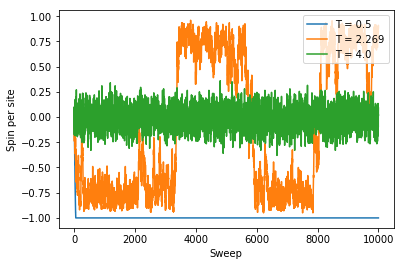

In [11]:
# Plot evolution of spin per site over time
for t_index in range(len(temperature_range)):
    plt.plot(range(number_of_sweeps),spin_per_site[t_index,:],label='T = {0}'.format(temperature_range[t_index]))
plt.legend(loc='upper right')
plt.xlabel('Sweep')
plt.ylabel('Spin per site')
plt.savefig('plots/Spin_per_site_vs_Sweep.png')